# Myopia Analysis
We will be utilizing unsupervised machine learning to predict myopia (nearsightedness). K-means clustering will be used to model and categorize patients into groups.

### Part 1: Prepare the Data

In [1]:
import pandas as pd

In [7]:
myopia_df = pd.read_csv("./Resources/myopia.csv")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [24]:
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [8]:
# Remove the 'MYOPIC' column
myopia_df.drop('MYOPIC', axis=1, inplace=True)
myopia_df.columns


Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [10]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler


In [28]:
df_scaled = StandardScaler().fit(myopia_df)
myopia_df_scaled= df_scaled.transform(myopia_df)

In [39]:
# Convert to dataframe and add column names
myopia_df_scaled = pd.DataFrame(data = myopia_df_scaled, columns=myopia_df.columns)
myopia_df_scaled.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


### Part 2: Apply Dimensionality Reduction

#### Reduce Dimension with PCA

In [14]:
from sklearn.decomposition import PCA

In [40]:
# Initialize PCA model
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(myopia_df_scaled)

In [43]:
myopia_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

In [45]:
# Create a list of the column names for principal components
pc_list = [f"principal component {x}" for x in range(1, len(myopia_pca[0])+1)]
pc_list

['principal component 1',
 'principal component 2',
 'principal component 3',
 'principal component 4',
 'principal component 5',
 'principal component 6',
 'principal component 7',
 'principal component 8',
 'principal component 9',
 'principal component 10']

In [75]:
myopia_df_pca = pd.DataFrame(data = myopia_pca, columns= pc_list)
myopia_df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


The number of features changed from 14 to 10 as we were reducing the principal components towards variances with 90% variance.

#### Reduce Dimensions with t-SNE

In [47]:
from sklearn.manifold import TSNE

In [76]:
tsne = TSNE(learning_rate=150) 
tsne_features = tsne.fit_transform(myopia_df_pca)
tsne_features.shape

c:\Users\krist\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [77]:
# Plot the data
# The first column of transformed features
myopia_df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_df_pca['y'] = tsne_features[:,1]

In [54]:
import matplotlib.pyplot as plt

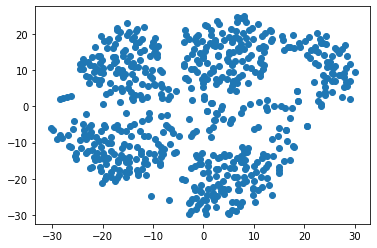

In [78]:
plt.scatter(myopia_df_pca['x'], myopia_df_pca['y'])
plt.show()

We could see that there are 5 distinct clusters within the data.

### Part 3: Perform a Cluster Analysis with K-means

In [79]:
from sklearn.cluster import KMeans

In [80]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\krist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,273893.587165
1,2,159864.802641
2,3,95680.664711
3,4,64722.453997
4,5,47533.775877


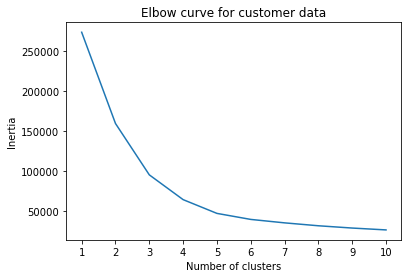

In [81]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [82]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [83]:
# Cluster the data
clusters = get_clusters(5, myopia_df_pca)
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-7.063511,1.945016,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,6.076421,18.849140,4
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-16.097174,-11.590881,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-4.249241,-20.019440,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-13.285379,20.800007,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,0.119264,2.100780,4
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,6.527612,19.197008,4
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,6.379244,20.694580,4
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,-20.369314,-6.843621,0


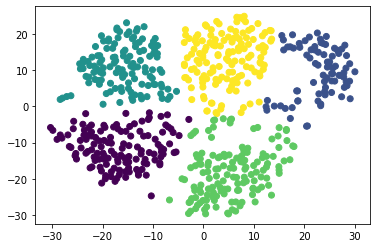

In [84]:
plt.scatter(myopia_df_pca['x'], myopia_df_pca['y'], c=myopia_df_pca['class'])
plt.show()

### Part 4: Recommendation
As a result of the K-means analysis and elbow chart displayed, the clients can be categorized into 5 clusters.